In [6]:
import cv2

In [7]:
img = cv2.imread('Lena.jpg')

In [3]:
cv2.imshow('Lena', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
cv2.imwrite('Lena.png', img)

True

In [9]:
(h, w, d) = img.shape
print(f'width={w}, height={h}, depth={d}')

width=512, height=512, depth=3


In [8]:
(B, G, R) = img[100, 50]
print(f'R={R}, G={G}, B={B}')

R=235, G=140, B=118


# Cắt ảnh

In [10]:
roi = img[50:350, 60:360]
# cv2.imshow('Region Of Interest', roi)
# cv2.waitKey(0)

-1

 # Thay đổi kích thước ảnh

In [11]:
r = 200.0 / w
dim = (200, int(h * r))
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
# cv2.imshow('Aspect Ratio Resize', resized)
# cv2.waitKey(0)

-1

# Vẽ trên hình ảnh

In [4]:
# Vẽ khung chữ nhật trên hình ảnh
# draw a 2px thick red rectangle surrounding the face
output = img.copy() #Tạo bản sao
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
#(320,60): tọa độ pixel bắt đầu phía trên bên trái
#(420,160): tọa độ pixcel kết thúc phía dưới bên phải
#(0,0,255): BGR tuple, màu Red
#thickness: ở đây đặt là 2
# cv2.imshow("Rectangle", output)
# cv2.waitKey(0)

-1

In [5]:
# Vẽ chấm tròn trên hình ảnh
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = img.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
#center: (300,150)
#radius: 20 px
#color: Blue (255,0,0)
#thickness: -1
# cv2.imshow("Circle", output)
# cv2.waitKey(0)

-1

In [6]:
#Vẽ đường thẳng màu đỏ
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = img.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
# cv2.imshow("Line", output)
# cv2.waitKey(0)

-1

In [7]:
# Viết text lên ảnh
# draw green text on the image
output = img.copy()
cv2.putText(output, "OpenCV + BVU!!!", (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
#scale: font sz multiplier (0.7)
#color: text color
#thickness
# cv2.imshow("Text", output)
# cv2.waitKey(0)


-1

# Chuyển thành ảnh xám

In [8]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray", gray)
# cv2.waitKey(0)

27

# Dò biên ảnh

In [9]:
# applying edge detection we can find the outlines of objects in images
img = cv2.imread('Lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 150)
#cv2.Canny
#img: gray
#minVal: a minimum threshold (30)
#maxVal: a maximun threshold (150)
# cv2.imshow("Edged", edged)
# cv2.waitKey(0)

-1

# Ngưỡng (Thresholding a grayscale image)

Ngưỡng ảnh là một bước trung gian quan trọng trong quy trình xử lý ảnh. Ngưỡng có 
thể giúp chúng ta loại bỏ các vùng và đường viền sáng hơn hoặc tối hơn của hình ảnh

In [11]:
# Ngưỡng
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
img = cv2.imread('tetris.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, 
cv2.THRESH_BINARY_INV)[1]
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)

-1

# Co và giãn ảnh

## Co ảnh

In [12]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
# cv2.imshow("Eroded", mask)
# cv2.waitKey(0)

-1

## Giãn ảnh

In [13]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
# cv2.imshow("Dilated", mask)
# cv2.waitKey(0)

-1

# Mặt nạ (masking an image)

In [14]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked regions
image = cv2.imread('tetris.jpg')
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
# cv2.imshow("Output", output)
# cv2.waitKey(0)

-1

# Điều chỉnh độ sáng, độ tương phản của hình ảnh

In [1]:
def controller(img, brightness=255, contrast=127):
    brightness = int((brightness - 0) * (255 - (-255)) / (510 - 0) + (-255))
    contrast = int((contrast - 0) * (127 - (-127)) / (254 - 0) + (-127))

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow

        cal = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)
    else:
        cal = img.copy()
    
    if contrast != 0:
        Alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        Gamma = 127 * (1 - Alpha)

        cal = cv2.addWeighted(cal, Alpha, cal, 0, Gamma)
    
    cv2.putText(cal, f'B:{brightness},C:{contrast}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    return cal

In [2]:
def BrightnessContract(brightness=0):
    brightness = cv2.getTrackbarPos('Brightness', 'LENA')  
    contrast = cv2.getTrackbarPos('Contrast', 'LENA')
    effect = controller(img, brightness, contrast)

    cv2.imshow('LENA', effect)

In [5]:
original = cv2.imread('Lena.png')
img = original.copy()
cv2.namedWindow('LENA')
cv2.imshow('LENA', img)
cv2.createTrackbar('Brightness', 'LENA', 0, 2*255, BrightnessContract)
cv2.createTrackbar('Contrast', 'LENA', 0, 2*127, BrightnessContract)
BrightnessContract(0)
cv2.waitKey(0)

-1

# Xóa nhiễu trên ảnh

In [8]:
img = cv2.imread('Lena.jpg')

In [9]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

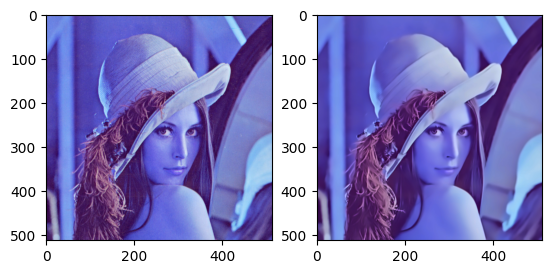

In [10]:
from matplotlib import pyplot as plt
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()